Business Objective:

1. Title of Database: Abalone data

2. Sources:

   (a) Original owners of database:
	Marine Resources Division
	Marine Research Laboratories - Taroona
	Department of Primary Industry and Fisheries, Tasmania
	GPO Box 619F, Hobart, Tasmania 7001, Australia
	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

   (b) Donor of database:
	Sam Waugh (Sam.Waugh@cs.utas.edu.au)
	Department of Computer Science, University of Tasmania
	GPO Box 252C, Hobart, Tasmania 7001, Australia

   (c) Date received: December 1995

3. Number of Instances: 4177

4. Number of Attributes: 8

5. From the  above description of the dataset predict the Sex of abalone using Logistic Regression Classifier and make notebook.


In [61]:
#Loading the dataset

url = 'C:/Users/Nikhil Jain/Desktop/Code/Logistic Regression/UPX/abalone.csv'

Importing basic packages

In [62]:
#Import basic packages

import warnings
warnings.filterwarnings("ignore")
import time
import pandas as pd               
import numpy as np
import pickle

from sklearn.model_selection import train_test_split   #splitting data
from pylab import rcParams
from sklearn.linear_model import LinearRegression         #linear regression
from sklearn.metrics.regression import mean_squared_error #error metrics
from sklearn.metrics import mean_absolute_error

import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

%matplotlib inline     
sns.set(color_codes=True)

In [63]:
# Code for displaying plotly express plots inline in colab
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
  
import plotly_express as px

In [64]:
#Read the data

df_avalone = pd.read_csv(url)
df_avalone.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [65]:
df_avalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4177 non-null   object 
 1   Length           4177 non-null   float64
 2   Diameter         4177 non-null   float64
 3   Height           4177 non-null   float64
 4   Whole weight     4177 non-null   float64
 5   Shucked weight   4177 non-null   float64
 6   Viscera weight   4177 non-null   float64
 7   Shell weight     4177 non-null   float64
 8   Rings            4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [66]:
df_avalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
import pandas_profiling
report = pandas_profiling.ProfileReport(df_avalone)
report.to_file('avalone.html')

Below are some inferences that can be made from analysing the data.     
        
        - No missing values in the dataset
        - All numerical features but 'sex'
        - Though features are not normaly distributed, are close to normality
        - None of the features have minimum = 0 except Height (requires re-check)
        - Each feature has difference scale range

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C8A83BE48>,
      dtype=object)

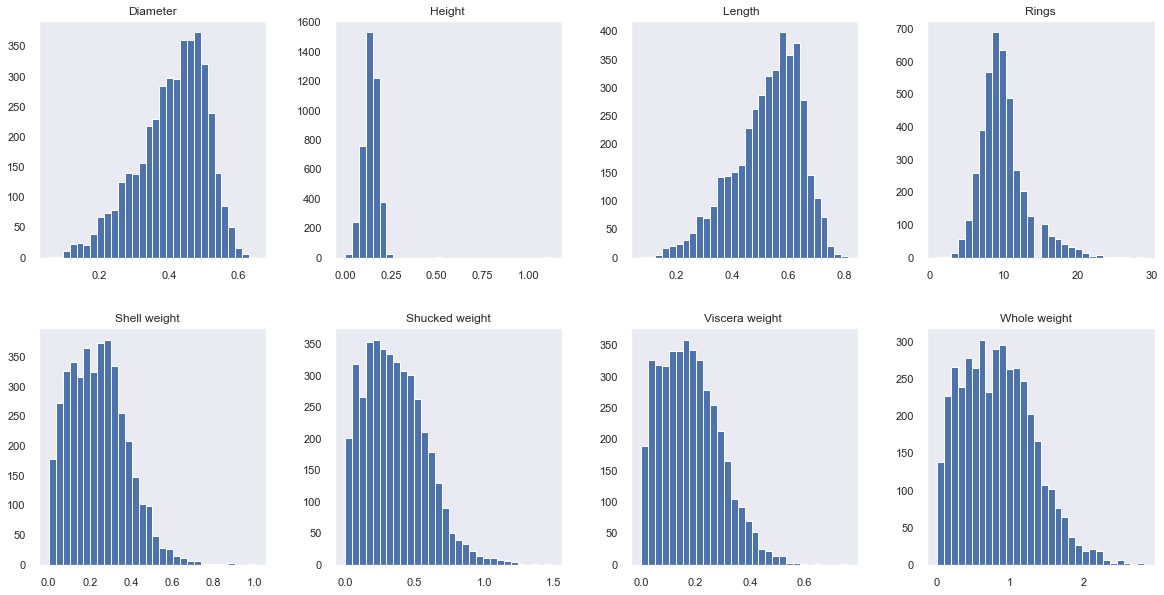

In [41]:
df_avalone.hist(figsize=(20,10), grid =False, layout = (2,4), bins=30)

In [9]:
numerical_features = df_avalone.select_dtypes(include=[np.number]).columns
categorical_features = df_avalone.select_dtypes(include=[np.object]).columns

In [10]:
numerical_features

Index(['Length  ', 'Diameter', 'Height ', 'Whole weight   ', 'Shucked weight',
       'Viscera weight ', 'Shell weight   ', 'Rings'],
      dtype='object')

In [11]:
categorical_features

Index(['Sex'], dtype='object')

In [13]:
from scipy.stats import skew

In [14]:
skew_values = skew(df_avalone[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


For normally distributed data, the skewness should be about 0. For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to 0, statistically speaking.

Height has the highest Skewness followed by Rings which can be verified from histogram plot that we just plotted above.

In [57]:
# Missing values
missing_values = df_avalone.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df_avalone))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
Sex_M,0,0.0
Sex_I,0,0.0
Sex_F,0,0.0
Rings,0,0.0
Shell weight,0,0.0
Viscera weight,0,0.0
Shucked weight,0,0.0
Whole weight,0,0.0
Height,0,0.0
Diameter,0,0.0


As said earlier , there are no missing values.

In [56]:
sns.countplot(x='Sex', data = df_avalone, palette='Set3')

ValueError: Could not interpret input 'Sex'

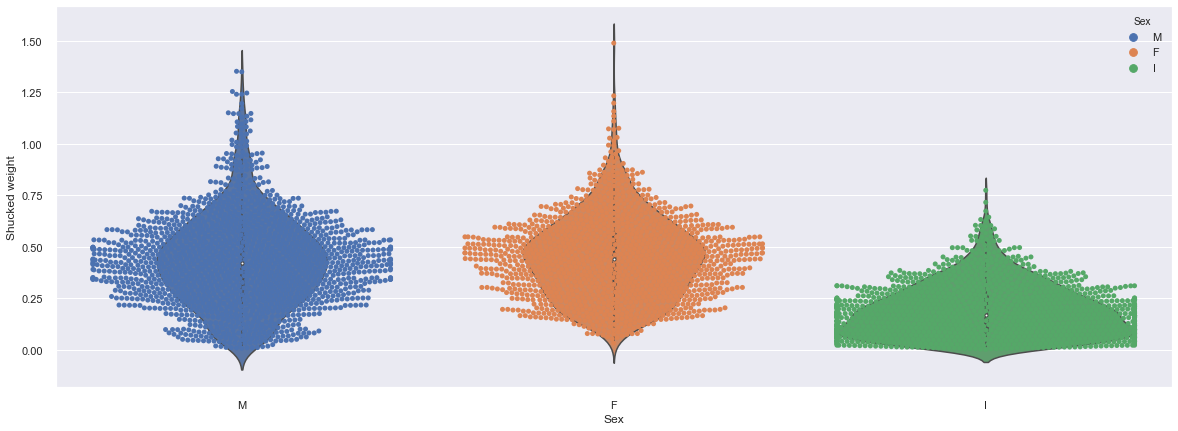

In [43]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Shucked weight', data = df_avalone, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Shucked weight', data = df_avalone)

Bivariate Analysis:

Bivariate analysis is vital part of data analysis process for, it gives clear picture on how each features are affected in presence of other features.
It also helps us understand and identify significance features, overcome multi-collinearity effect, inter-dependency and thus, provides insights on hidden data noise pattern.

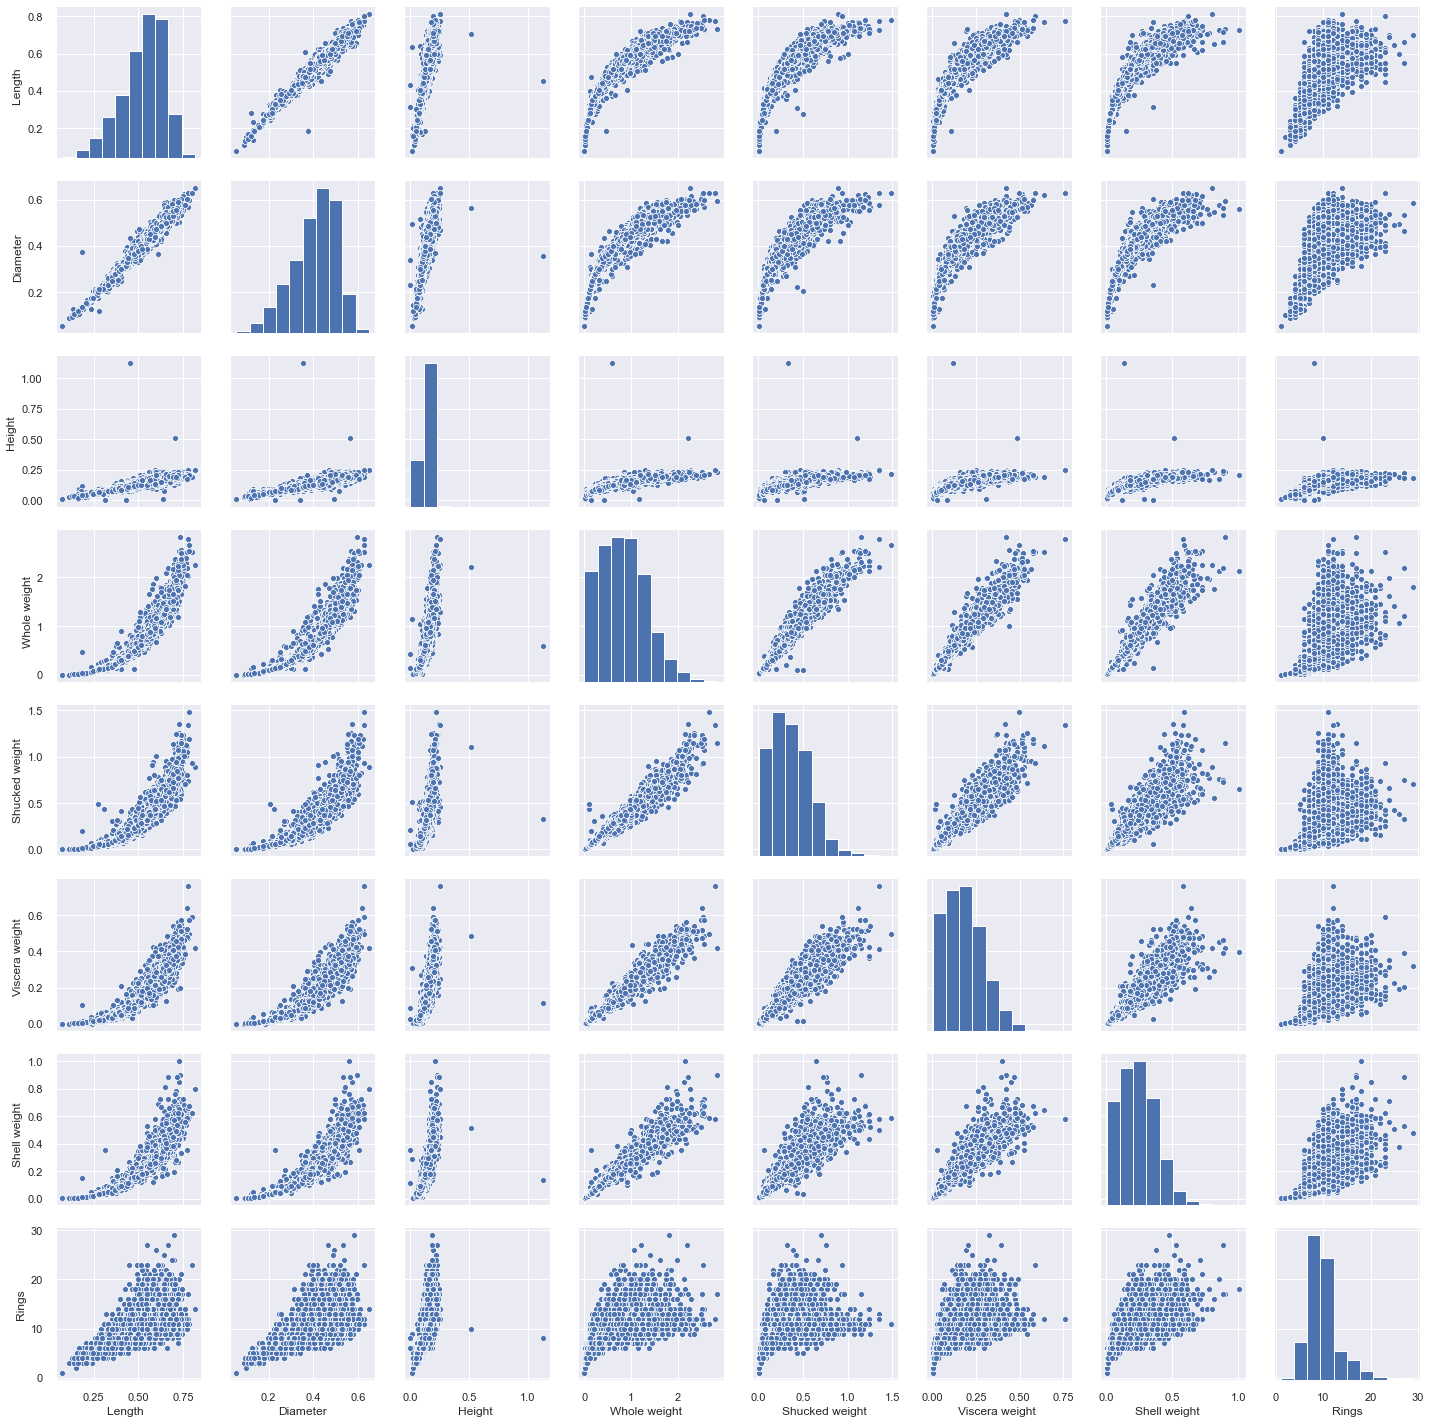

In [45]:
sns.pairplot(df_avalone[numerical_features])

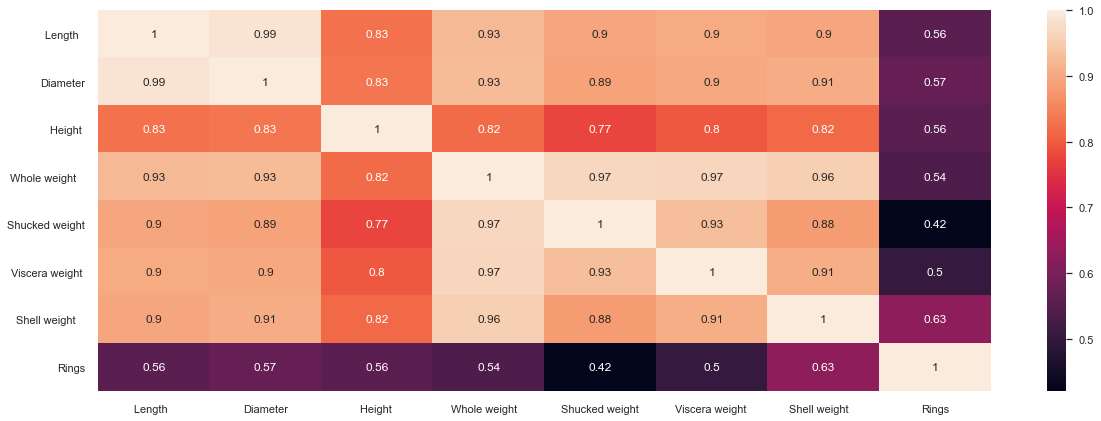

In [48]:
plt.figure(figsize=(20,7))
sns.heatmap(df_avalone[numerical_features].corr(), annot=True)

Outliers Handling:

In [55]:
df_avalone.head(3)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,1,0,0


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [67]:
## Variable selection or feature selection
y=df_avalone[categorical_features]
del df_avalone[categorical_features]
x=df_avalone

TypeError: 'Index(['Sex'], dtype='object')' is an invalid key